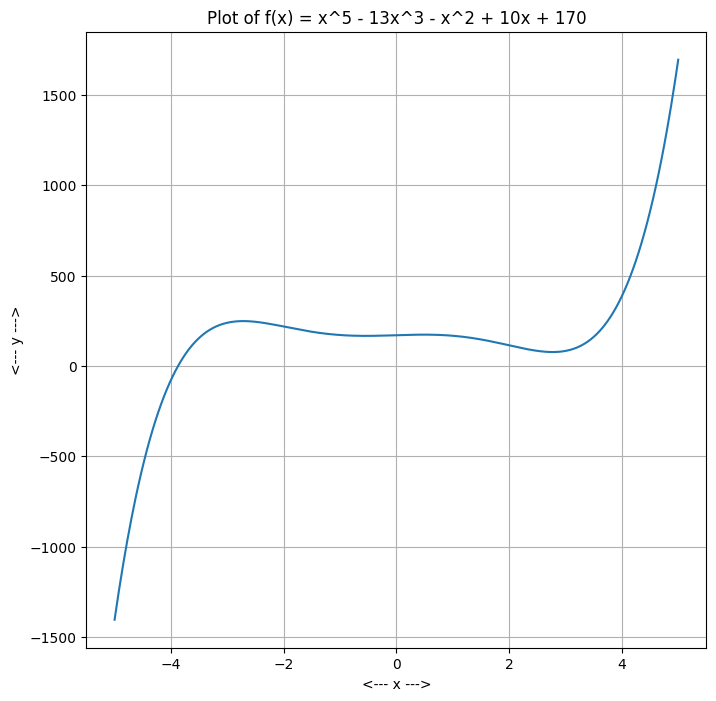

Number of real roots: 1


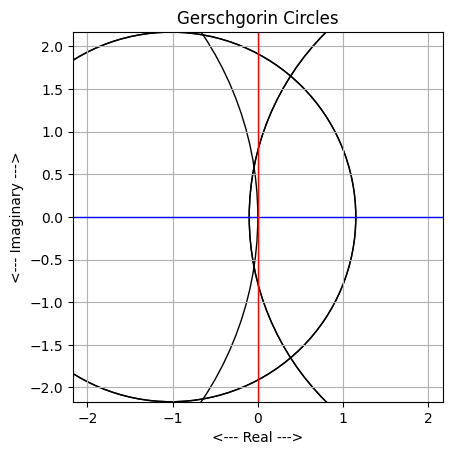

In [41]:
#roll_no - ch22b057

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**5 - 13*x**3 - x**2 + 10*x + 170

x = np.linspace(-5, 5, 400)
y = f(x)

plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.xlabel('<--- x --->')
plt.ylabel('<--- y --->')
plt.title('Plot of f(x) = x^5 - 13x^3 - x^2 + 10x + 170')
plt.grid(True)
plt.show()

coefficients = [1, 0, -13, -1, 10, 170]  
roots = np.roots(coefficients)
real_roots = np.isreal(roots).sum()
print("Number of real roots:", real_roots)

def calculate_gerschgorin_circles(coefficients):
    degree = len(coefficients) - 1
    roots = np.roots(coefficients)
    real_roots = np.isreal(roots)
    circles = []

    for root in roots:
        circle_center = np.real(root)
        circle_radius = np.abs(root)

        if degree % 2 == 0:
            circle_radius /= 2

        circles.append((circle_center, circle_radius))

    return circles

def plot_gerschgorin_circles(circles):
    fig, ax = plt.subplots()

    for circle in circles:
        circle_center, circle_radius = circle
        circle_plot = plt.Circle((circle_center, 0), circle_radius, fill=False)
        ax.add_patch(circle_plot)

    ax.axhline(0, color='blue', linewidth=1)
    ax.axvline(0, color='red', linewidth=1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('<--- Real --->')
    ax.set_ylabel('<--- Imaginary --->')

    plt.xlim(-max(circle_radius, 1.5), max(circle_radius, 1.5))
    plt.ylim(-max(circle_radius, 1.5), max(circle_radius, 1.5))
    plt.title('Gerschgorin Circles')
    plt.grid(True)
    plt.show()

gerschgorin_circles = calculate_gerschgorin_circles(coefficients)
plot_gerschgorin_circles(gerschgorin_circles)


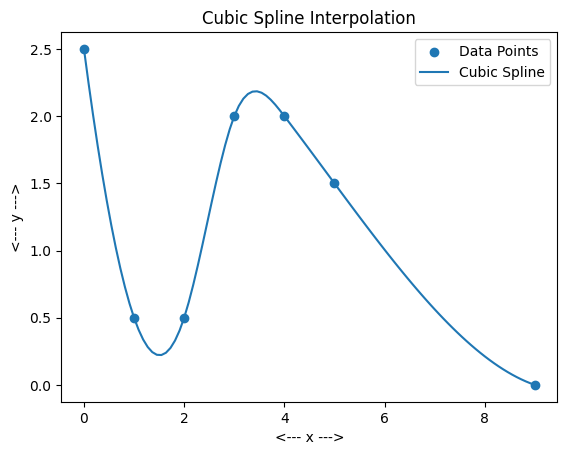

Polynomial equation:            6          5         4         3         2
-0.008573 x + 0.1828 x - 1.375 x + 4.366 x - 4.953 x - 0.2129 x + 2.5


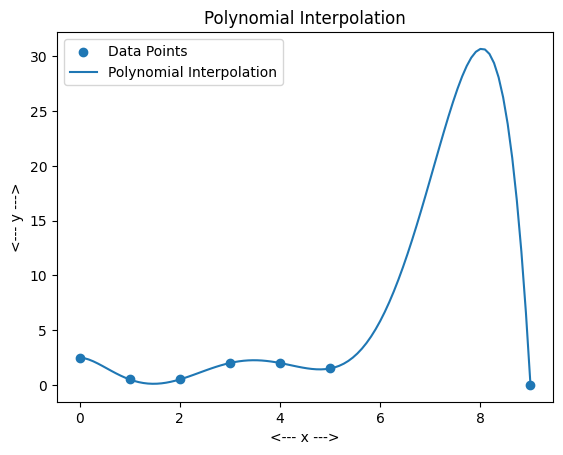

In [42]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

#Cubic Spline Interpolation
x = [0, 1, 2, 3, 4, 5, 9] 
y = [2.5, 0.5, 0.5, 2, 2, 1.5, 0]  
cubic_spline = CubicSpline(x, y)

x_values = np.linspace(min(x), max(x), 100)
y_values = cubic_spline(x_values)

plt.scatter(x, y, label='Data Points')
plt.plot(x_values, y_values, label='Cubic Spline')
plt.xlabel('<--- x --->')
plt.ylabel('<--- y --->')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()

#Polynomial Interpolation
degree = 6
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)
y_values = polynomial(x_values)
print("Polynomial equation:", polynomial)

plt.scatter(x, y, label='Data Points')
plt.plot(x_values, y_values, label='Polynomial Interpolation')
plt.xlabel('<--- x --->')
plt.ylabel('<--- y --->')
plt.title('Polynomial Interpolation')
plt.legend()
plt.show()

